In [176]:
import pandas as pd
import yfinance as yf

In [177]:
data = pd.read_csv('pivots.csv')
data = data.rename({data.columns[0]:'Date'}, axis = 1)
#data = data.set_index(data.columns[0])

In [178]:
# now we need to make the previous days pair onto the next day of data

In [179]:
copy = data.copy()

In [180]:
copy['PH'] = copy['PH'].shift(1)
copy['PL'] = copy['PL'].shift(1)

In [181]:
copy = copy.dropna(axis = 0)

In [182]:
# is it valid?
valid = []
for i in range(len(copy)):
    if copy.iloc[i]['PH'] > copy.iloc[i]['PL']:
        valid.append(1)
    else:
        valid.append(0)
copy['Valid'] = valid
copy = copy.set_index('Date')

In [183]:
copy

,PH,PL,Valid
Date,,,
2000-09-19,1475.333333,1483.833333,0
2000-09-20,1482.250000,1478.500000,1
2000-09-21,1473.125000,1469.000000,1
2000-09-22,1472.916667,1468.166667,1
2000-09-25,1468.625000,1454.000000,1
...,...,...,...
2021-05-14,4102.333333,4073.333333,1
2021-05-17,4164.916667,4137.666667,1
2021-05-18,4162.708333,4162.583333,1


In [184]:
# use most recent pivots that made sense. # Can specific vix cluster predict 

In [185]:
vix = yf.Ticker('^VIX').history(period = 'max')

In [186]:
vix = vix.loc['2000-09-19':'2021-05-20']

In [187]:
x = copy.join(vix, how = 'outer')

In [188]:
x['prev_vol_range'] = abs(x['High'].shift(2) - x['Low'].shift(2))

In [189]:
x = x.dropna(axis = 0)

In [190]:
import numpy as np

In [191]:
np.corrcoef(x['Valid'], x['prev_vol_range'])

array([[ 1.        , -0.00654428],
       [-0.00654428,  1.        ]])

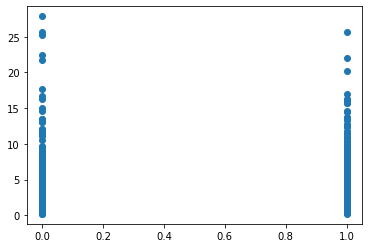

In [192]:
import matplotlib.pyplot as plt
plt.scatter(x['Valid'], x['prev_vol_range'])

In [193]:
x

,PH,PL,Valid,Open,High,Low,Close,Volume,Dividends,Stock Splits,prev_vol_range
Date,,,,,,,,,,,
2000-09-21,1473.125000,1469.000000,1.0,20.170000,20.709999,20.010000,20.180000,0.0,0.0,0.0,0.709999
2000-09-22,1472.916667,1468.166667,1.0,22.090000,22.660000,20.740000,20.740000,0.0,0.0,0.0,1.260000
2000-09-25,1468.625000,1454.000000,1.0,20.850000,21.660000,20.660000,21.410000,0.0,0.0,0.0,0.699999
2000-09-26,1467.875000,1473.500000,0.0,21.500000,22.090000,21.100000,21.879999,0.0,0.0,0.0,1.920000
2000-09-27,1451.916667,1463.666667,0.0,21.709999,22.100000,21.389999,21.670000,0.0,0.0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-14,4102.333333,4073.333333,1.0,21.770000,22.100000,18.660000,18.809999,0.0,0.0,0.0,6.719999
2021-05-17,4164.916667,4137.666667,1.0,19.889999,21.580000,19.670000,19.719999,0.0,0.0,0.0,6.700001
2021-05-18,4162.708333,4162.583333,1.0,18.889999,21.450001,18.809999,21.340000,0.0,0.0,0.0,3.440001


In [194]:
from sklearn.cluster import KMeans


In [196]:
a = [[a,b] for a,b in zip(x['High'], x['Low'])]

In [170]:
kmeans = KMeans(n_clusters = 5, random_state = 0).fit(a)

In [207]:
predicted = []

for i in range(len(x)):
    predicted.append(kmeans.predict([[x.iloc[i]['High'], x.iloc[i]['Low']]]))
x['predicted'] = predicted

(array([[0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.]]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 5138 BarContainer objects>)

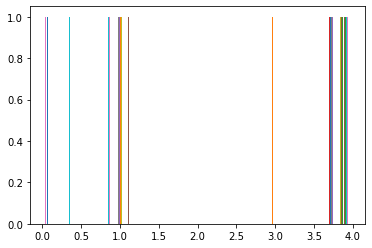

In [211]:
plt.hist(x['predicted'])

In [201]:
centers, labels = find_clusters(a, 4)
plt.scatter(a[:, 0], a[:, 1], c=labels,
            s=50, cmap='viridis');

AttributeError: 'list' object has no attribute 'shape'